In [1]:
# intalling folium
!pip install folium

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011


In [2]:
# import pandas, numpy, matplotlib, seaborn, folium, requests, json, BeautifulSoup

# library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle data in a vectorized manner
import numpy as np


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
import folium 
import requests
import json
from bs4 import BeautifulSoup

# Nominatim converts an address into latitude and langitude values
from geopy.geocoders import Nominatim

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("all libraries have been imported");

all libraries have been imported


In [5]:
Sgsz2_df = pd.read_csv('Cleaned up Sobzones and Planning Area.csv')

In [6]:
Sgsz2_df.head()

,Subzone,Planning Area
0,Flora Drive,Pasir Ris
1,Loyang East,Pasir Ris
2,Loyang West,Pasir Ris
3,Pasir Ris Central,Pasir Ris
4,Pasir Ris Drive,Pasir Ris


In [3]:
# The code was removed by Watson Studio for sharing.

(78, 3)

In [4]:
latitude_na = Sgtc_f[Sgtc_f['Latitude'] >= 2].index
Sgtc_f.drop(latitude_na, inplace=True)
Sgtc_f.shape

(76, 3)

In [5]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Singapore are {}. {}.'.format(latitude, longitude))

The geographical coordinate of Singapore are 1.357107. 103.8194992.


In [9]:
# store the Toronto's latitude and longitude info
singapore_latlong = [latitude, longitude]
print(singapore_latlong)

# use folium library to create a map of Toronto using latitude
# and longitude values
map_singapore = folium.Map(location=singapore_latlong, tiles="OpenStreetMap", zoom_start=10.5
                    )

# add markers to map
for lat, lng, label in zip(Sgtc_f['Latitude'], Sgtc_f['Longitude'],Sgtc_f['Subzone']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color='blue',
        fill= True,
        fill_color='#2E7D32',
        fill_opacity=0.5,
        parse_html=False).add_to(map_singapore)
    
    
map_singapore

[1.357107, 103.8194992]


2) Explore the first neighborhood in our dataframe
Deifine Foursquare Credentials and Version

In [10]:
sbzone = Sgtc_f.loc[0,'Subzone']
sbzone

'Flora Drive'

Now let's explore the top 100 venues that are in Ang Mo kio within a radius of 500 meters.

In [11]:
CLIENT_ID = 'YRKZ44SHQRO4UDMIPWFL2WICIH5BY0KLFEEBPUWKKYD2NUUK'
CLIENT_SECRET = 'OJCVO344VVYQTUOLCTCUYQ12D2XUHI0TYFIOFBYSKSNRV5F0'
VERSION = '20180605'

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: YRKZ44SHQRO4UDMIPWFL2WICIH5BY0KLFEEBPUWKKYD2NUUK
CLIENT_SECRET:OJCVO344VVYQTUOLCTCUYQ12D2XUHI0TYFIOFBYSKSNRV5F0


In [12]:
sbzone_latitude = Sgtc_f.loc[0, 'Latitude']
sbzone_longitude = Sgtc_f.loc[0, 'Longitude']

sbzone_name = Sgtc_f.loc[0, 'Subzone']

print('Latitude and longitude values of {} are {}, {}.'.format(sbzone_name,sbzone_latitude,sbzone_longitude))

Latitude and longitude values of Flora Drive are 1.3535816999999999, 103.967412.


In [80]:
# set the number of venues of returned by Foursquare API to be 100
LIMIT = 100 

# define radius as 1000 meters
radius = 500

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    sbzone_latitude,
    sbzone_longitude,
    radius,
    LIMIT)

# display URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YRKZ44SHQRO4UDMIPWFL2WICIH5BY0KLFEEBPUWKKYD2NUUK&client_secret=OJCVO344VVYQTUOLCTCUYQ12D2XUHI0TYFIOFBYSKSNRV5F0&v=20180605&ll=1.3535816999999999,103.967412&radius=500&limit=100'

In [81]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecfc6c3211536001bb49320'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Changi',
  'headerFullLocation': 'Changi, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 1.3580817045000044,
    'lng': 103.97190485618356},
   'sw': {'lat': 1.3490816954999953, 'lng': 103.96291914381644}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c85d001d8086dcb0e529552',
       'name': 'Bus Stop 97039 (Bef Jln Bena)',
       'location': {'address': 'Upper Changi Rd.',
        'lat': 1.355541212811971,
        'lng': 103.96881196072702,
        'labeledLatLngs': [{'label': 'display',
          

In [82]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [83]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bus Stop 97039 (Bef Jln Bena),Bus Station,1.355541,103.968812
1,Fairprice Express,Food & Drink Shop,1.356388,103.967481
2,Bernie's,Bar,1.356419,103.967534
3,Edelweiss Park Condo Lower Deck,Pool,1.356469,103.967616


In [84]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the subzones in the table

In [85]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Subzone', 
                  'Subzone Latitude', 
                  'Subzone Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
singapore_venues = getNearbyVenues(names=Sgtc_f['Subzone'],
                                   latitudes=Sgtc_f['Latitude'],
                                   longitudes=Sgtc_f['Longitude']
                                  )

Flora Drive
Loyang East
Loyang West
Pasir Ris Central 
Pasir Ris Drive
Pasir Ris Park
Pasir Ris West
Elias
Simei
Tampines East
Tampines North
Tampines West
Xilin
Bayshore
Bedok North
Bedok Reservoir
Bedok South
Frankel
Kaki Bukit
Kembangan
Siglap
Brickworks
Bukit Batok Central
Bukit Batok East
Bukit Batok South
Bukit Batok West
Gombak
Guilin
Hillview
Hong Kah North
Defu Industrial Park
Hougang Central
Hougang East
Hougang West
Kangkar
Kovan 
Lorong Ah Soo
Lorong Halus 
Tai Seng 
Bangkit
Dairy Farm
Fajar
Jelebu
Saujana
Senja
Boon Lay Place
Chin Bee
Hong Kah
Jurong West Central
Kian Teck
Safti
Taman Jurong
Wenya
Yunnan
Anchorvale 
Compassvale 
Fernvale
Lorong Halus North 
Rivervale 
Sengkang Town Centre
Sengkang West 
Greenwood Park
Midview
North Coast
Senoko West
Woodgrove
Woodlands East
Woodlands Regional Centre
Woodlands South
Woodlands West
Choa Chu Kang Central
Choa Chu Kang North 
Keat Hong
Peng Siang
Teck Whye
Yew Tee


In [87]:
print(singapore_venues.shape)
singapore_venues.head()

(7600, 7)


,Subzone,Subzone Latitude,Subzone Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Flora Drive,1.353582,103.967412,Singapore Changi Airport (SIN) (Singapore Chan...,1.353767,103.987849,Airport
1,Flora Drive,1.353582,103.967412,Jewel Changi Airport,1.360119,103.989790,Shopping Mall
2,Flora Drive,1.353582,103.967412,HSBC Rain Vortex,1.360151,103.989740,Waterfall
3,Flora Drive,1.353582,103.967412,Butterfly Garden,1.357806,103.986317,Garden
4,Flora Drive,1.353582,103.967412,Singapore Airlines First Class Check-In Reception,1.355134,103.986732,Airport Lounge


In [88]:
singapore_venues['Venue Category'].value_counts()

Park                                        440
Chinese Restaurant                          436
Coffee Shop                                 378
Bakery                                      239
Café                                        238
Food Court                                  219
Thai Restaurant                             178
Ice Cream Shop                              173
Hotel                                       170
Supermarket                                 158
Indian Restaurant                           148
Italian Restaurant                          147
Exhibit                                     137
Trail                                       135
Shopping Mall                               126
Beach                                       124
Asian Restaurant                            121
Nature Preserve                             120
Japanese Restaurant                         117
Garden                                      113
Furniture / Home Store                  

In [89]:
singapore_venues.groupby('Subzone').count()

,Subzone Latitude,Subzone Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subzone,,,,,,
Anchorvale,100,100,100,100,100,100
Bangkit,100,100,100,100,100,100
Bayshore,100,100,100,100,100,100
Bedok North,100,100,100,100,100,100
Bedok Reservoir,100,100,100,100,100,100
Bedok South,100,100,100,100,100,100
Boon Lay Place,100,100,100,100,100,100
Brickworks,100,100,100,100,100,100
Bukit Batok Central,100,100,100,100,100,100


In [90]:
print('There are {} unique categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 178 unique categories.


In [91]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Subzone'] = singapore_venues['Subzone'] 

# move neighborhood column to the first column
col_name="Subzone"
first_col = singapore_onehot.pop(col_name)
singapore_onehot.insert(0, col_name, first_col)

singapore_onehot.head()

,Subzone,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Beer Bar,Beer Garden,Bistro,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Butcher,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Theater,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fishing Spot,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,High School,Historic Site,Hobby Shop,Hockey Arena,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Laundromat,Malay Restaurant,Massage Studio,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Nature Preserve,Non-Profit,Noodle House,Outdoors & Recreation,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pier,Pizza Place,Playground,Plaza,Pool,Public Art,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Flora Drive,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Flora Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Flora Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Flora Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Flora Drive,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [92]:
singapore_onehot.shape

(7600, 179)

Analyze each Neighborhood

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [93]:
singapore_grouped = singapore_onehot.groupby('Subzone').mean().reset_index()
singapore_grouped

,Subzone,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Beer Bar,Beer Garden,Bistro,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Butcher,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Theater,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fishing Spot,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,High School,Historic Site,Hobby Shop,Hockey Arena,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Laundromat,Malay Restaurant,Massage Studio,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Nature Preserve,Non-Profit,Noodle House,Outdoors & Recreation,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pier,Pizza Place,Playground,Plaza,Pool,Public Art,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Anchorvale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.07,0.00,0.00,0.03,0.00,0.00,0.07,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.11,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Bangkit,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.01,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.05,0.00,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.04,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.05,0.00,0.01,0.01,0.00,0.08,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00

In [94]:
singapore_grouped.shape

(76, 179)

In [95]:
num_top_venues = 10

for hood in singapore_grouped['Subzone']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Subzone'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anchorvale ----
                venue  freq
0                Park  0.11
1         Coffee Shop  0.07
2  Chinese Restaurant  0.07
3         Supermarket  0.04
4      Ice Cream Shop  0.04
5               Trail  0.04
6              Bridge  0.04
7              Bakery  0.04
8     Thai Restaurant  0.04
9                Café  0.03


----Bangkit----
                venue  freq
0                Park  0.08
1             Exhibit  0.05
2     Nature Preserve  0.05
3  Chinese Restaurant  0.04
4  Italian Restaurant  0.04
5              Bakery  0.03
6               Trail  0.03
7         Coffee Shop  0.02
8          Food Court  0.02
9   French Restaurant  0.02


----Bayshore----
                    venue  freq
0             Coffee Shop  0.09
1      Chinese Restaurant  0.08
2              Food Court  0.06
3                   Beach  0.05
4                    Park  0.04
5                  Bakery  0.04
6       Indian Restaurant  0.03
7      Seafood Restaurant  0.03
8               BBQ Joint  0.03
9  Furn

In [96]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [97]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Subzone']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
subzones_venues_sorted = pd.DataFrame(columns=columns)
subzones_venues_sorted['Subzone'] = singapore_grouped['Subzone']

for ind in np.arange(singapore_grouped.shape[0]):
    subzones_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

subzones_venues_sorted

,Subzone,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anchorvale,Park,Chinese Restaurant,Coffee Shop,Ice Cream Shop,Trail,Bridge,Supermarket,Thai Restaurant,Bakery,Café
1,Bangkit,Park,Nature Preserve,Exhibit,Chinese Restaurant,Italian Restaurant,Bakery,Trail,Zoo Exhibit,Zoo,Mountain
2,Bayshore,Coffee Shop,Chinese Restaurant,Food Court,Beach,Bakery,Park,Indian Restaurant,BBQ Joint,Seafood Restaurant,Thai Restaurant
3,Bedok North,Coffee Shop,Chinese Restaurant,Park,Hotel,BBQ Joint,Beach,Bakery,Café,Indian Restaurant,Thai Restaurant
4,Bedok Reservoir,Chinese Restaurant,Coffee Shop,Park,Thai Restaurant,BBQ Joint,Beach,Bakery,Café,Ice Cream Shop,Furniture / Home Store
5,Bedok South,Coffee Shop,Chinese Restaurant,Beach,Food Court,Park,Bakery,Indian Restaurant,Seafood Restaurant,Furniture / Home Store,Ice Cream Shop
6,Boon Lay Place,Chinese Restaurant,Food Court,Italian Restaurant,Café,Coffee Shop,Park,Asian Restaurant,Exhibit,Shopping Mall,Nature Preserve
7,Brickworks,Hotel,Shopping Mall,Park,Theme Park Ride / Attraction,Japanese Restaurant,Scenic Lookout,Coffee Shop,Resort,Cocktail Bar,Art Gallery
8,Bukit Batok Central,Food Court,Bakery,Park,Nature Preserve,Chinese Restaurant,Italian Restaurant,Supermarket,Indian Restaurant,Garden,Café
9,Bukit Batok East,Chinese Restaurant,Food Court,Bakery,Park,Nature Preserve,Italian Restaurant,Supermarket,Café,Garden,Zoo


In [98]:
subzones_venues_sorted.shape

(76, 11)

In [99]:
subzones_venues_sorted.to_csv('Singapore_subzones_venues_sorted.csv', index = False)

Clustering

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(singapore_grouped)
    distortions.append(kmeanModel.inertia_)


ValueError: could not convert string to float: 'Yunnan'

ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

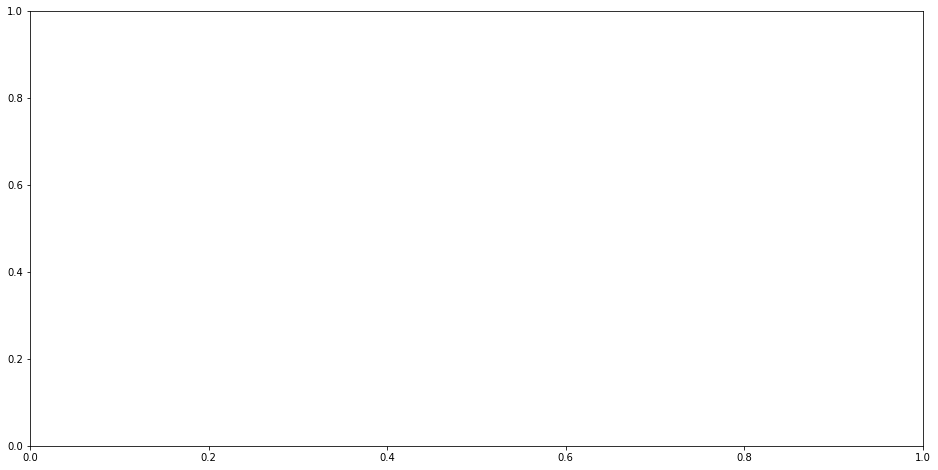

In [101]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


In [108]:

# set number of clusters, I wanted to do 9 but it always gives me 5 so
kclusters =11

# remove the neighborhood column 
singapore_grouped_clustering = singapore_grouped.drop('Subzone', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 0,  6,  8,  5,  8,  8,  4, 10,  9,  9], dtype=int32)

In [109]:

# this code is added because without it, the following insert code always gives an error that the column already exists
if 'Cluster Labels' in subzones_venues_sorted.columns:
    subzones_venues_sorted.drop(labels='Cluster Labels', axis=1, inplace=True)

subzones_venues_sorted.head()

,Subzone,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anchorvale,Park,Chinese Restaurant,Coffee Shop,Ice Cream Shop,Trail,Bridge,Supermarket,Thai Restaurant,Bakery,Café
1,Bangkit,Park,Nature Preserve,Exhibit,Chinese Restaurant,Italian Restaurant,Bakery,Trail,Zoo Exhibit,Zoo,Mountain
2,Bayshore,Coffee Shop,Chinese Restaurant,Food Court,Beach,Bakery,Park,Indian Restaurant,BBQ Joint,Seafood Restaurant,Thai Restaurant
3,Bedok North,Coffee Shop,Chinese Restaurant,Park,Hotel,BBQ Joint,Beach,Bakery,Café,Indian Restaurant,Thai Restaurant
4,Bedok Reservoir,Chinese Restaurant,Coffee Shop,Park,Thai Restaurant,BBQ Joint,Beach,Bakery,Café,Ice Cream Shop,Furniture / Home Store


In [110]:
# adding the cluster labels

subzones_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, True)

subzones_venues_sorted.head()

,Cluster Labels,Subzone,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Anchorvale,Park,Chinese Restaurant,Coffee Shop,Ice Cream Shop,Trail,Bridge,Supermarket,Thai Restaurant,Bakery,Café
1,6,Bangkit,Park,Nature Preserve,Exhibit,Chinese Restaurant,Italian Restaurant,Bakery,Trail,Zoo Exhibit,Zoo,Mountain
2,8,Bayshore,Coffee Shop,Chinese Restaurant,Food Court,Beach,Bakery,Park,Indian Restaurant,BBQ Joint,Seafood Restaurant,Thai Restaurant
3,5,Bedok North,Coffee Shop,Chinese Restaurant,Park,Hotel,BBQ Joint,Beach,Bakery,Café,Indian Restaurant,Thai Restaurant
4,8,Bedok Reservoir,Chinese Restaurant,Coffee Shop,Park,Thai Restaurant,BBQ Joint,Beach,Bakery,Café,Ice Cream Shop,Furniture / Home Store


In [111]:


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
# I changed the "join" to "merge" because using the former changes the cluster labels dtype to float but I don't know why, 
# and I tried to change the datatype using astype, but it gave an eroor saying non finite digits can not be converted

singapore_merged = pd.merge(Sgtc_f, subzones_venues_sorted, on='Subzone')

singapore_merged.head() # check the last columns!

,Subzone,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flora Drive,1.353582,103.967412,3,Coffee Shop,Chinese Restaurant,Beach,Bakery,Café,Park,Thai Restaurant,Food Court,Supermarket,Furniture / Home Store
1,Loyang East,1.375368,103.977292,3,Coffee Shop,Chinese Restaurant,Bakery,Park,Café,Thai Restaurant,Airport Lounge,Beach,Hotel,Indian Restaurant
2,Loyang West,1.375368,103.977292,3,Coffee Shop,Chinese Restaurant,Bakery,Park,Café,Thai Restaurant,Airport Lounge,Beach,Hotel,Indian Restaurant
3,Pasir Ris Central,1.371993,103.949377,3,Coffee Shop,Chinese Restaurant,Park,Beach,Café,Bakery,Supermarket,Bridge,Thai Restaurant,Dessert Shop
4,Pasir Ris Drive,1.373031,103.949255,3,Coffee Shop,Chinese Restaurant,Park,Bakery,Café,Beach,Supermarket,Bridge,Thai Restaurant,Dessert Shop


In [112]:
singapore_merged.shape

(76, 14)

Finally, let's visualize the resulting clusters

In [113]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['Subzone'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


2). Examine Clusters
Now, you can examine each cluster


In [114]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Park Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Hougang Central,0,Park,Coffee Shop,Chinese Restaurant,Bakery,Supermarket,Thai Restaurant,BBQ Joint,Trail,Bridge,Café
32,Hougang East,0,Park,Coffee Shop,Chinese Restaurant,Bakery,Café,Thai Restaurant,BBQ Joint,Supermarket,Clothing Store,Bridge
33,Hougang West,0,Park,Coffee Shop,Chinese Restaurant,Bakery,Café,Thai Restaurant,BBQ Joint,Supermarket,Clothing Store,Bridge
34,Kangkar,0,Park,Chinese Restaurant,Coffee Shop,Bakery,Thai Restaurant,Breakfast Spot,Indian Restaurant,Dessert Shop,Clothing Store,Bridge
37,Lorong Halus,0,Park,Coffee Shop,Chinese Restaurant,Bakery,Café,Beach,Thai Restaurant,Ice Cream Shop,Bridge,Breakfast Spot
54,Anchorvale,0,Park,Chinese Restaurant,Coffee Shop,Ice Cream Shop,Trail,Bridge,Supermarket,Thai Restaurant,Bakery,Café
55,Compassvale,0,Park,Chinese Restaurant,Coffee Shop,Bakery,Trail,Thai Restaurant,Bridge,Supermarket,Dessert Shop,Vegetarian / Vegan Restaurant
56,Fernvale,0,Park,Chinese Restaurant,Ice Cream Shop,Bridge,Supermarket,Trail,Clothing Store,Coffee Shop,Spa,Seafood Restaurant
57,Lorong Halus North,0,Park,Chinese Restaurant,Coffee Shop,Bakery,Thai Restaurant,Breakfast Spot,BBQ Joint,Trail,Vegetarian / Vegan Restaurant,Bridge
58,Rivervale,0,Park,Coffee Shop,Chinese Restaurant,Bakery,Thai Restaurant,BBQ Joint,Clothing Store,Bridge,Trail,Breakfast Spot


In [115]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Exhibist Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Choa Chu Kang Central,1,Chinese Restaurant,Exhibit,Food Court,Nature Preserve,Coffee Shop,Italian Restaurant,Asian Restaurant,Park,Zoo,Mountain
71,Choa Chu Kang North,1,Chinese Restaurant,Exhibit,Food Court,Park,Coffee Shop,Nature Preserve,Lake,Asian Restaurant,Zoo,Italian Restaurant
73,Peng Siang,1,Coffee Shop,Exhibit,Food Court,Nature Preserve,Chinese Restaurant,Zoo,Italian Restaurant,Park,Farm,Asian Restaurant
75,Yew Tee,1,Park,Exhibit,Nature Preserve,Coffee Shop,Chinese Restaurant,Lake,Food Court,Italian Restaurant,Indian Restaurant,Mountain


In [116]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Hotel Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Kaki Bukit,2,Hotel,Park,Coffee Shop,Chinese Restaurant,Performing Arts Venue,Beach,Ice Cream Shop,Bakery,Garden,Furniture / Home Store
30,Defu Industrial Park,2,Hotel,Park,Chinese Restaurant,Coffee Shop,Bakery,Café,Trail,Thai Restaurant,Ice Cream Shop,Breakfast Spot
35,Kovan,2,Park,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Thai Restaurant,Café,Bridge,Trail,Japanese Restaurant
36,Lorong Ah Soo,2,Park,Hotel,Coffee Shop,Chinese Restaurant,Café,Trail,Bakery,Performing Arts Venue,Event Space,Thai Restaurant
38,Tai Seng,2,Hotel,Park,Coffee Shop,Chinese Restaurant,Bakery,Event Space,Performing Arts Venue,BBQ Joint,Botanical Garden,Café


In [117]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Coffee Shop Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flora Drive,3,Coffee Shop,Chinese Restaurant,Beach,Bakery,Café,Park,Thai Restaurant,Food Court,Supermarket,Furniture / Home Store
1,Loyang East,3,Coffee Shop,Chinese Restaurant,Bakery,Park,Café,Thai Restaurant,Airport Lounge,Beach,Hotel,Indian Restaurant
2,Loyang West,3,Coffee Shop,Chinese Restaurant,Bakery,Park,Café,Thai Restaurant,Airport Lounge,Beach,Hotel,Indian Restaurant
3,Pasir Ris Central,3,Coffee Shop,Chinese Restaurant,Park,Beach,Café,Bakery,Supermarket,Bridge,Thai Restaurant,Dessert Shop
4,Pasir Ris Drive,3,Coffee Shop,Chinese Restaurant,Park,Bakery,Café,Beach,Supermarket,Bridge,Thai Restaurant,Dessert Shop
5,Pasir Ris Park,3,Coffee Shop,Park,Bakery,Chinese Restaurant,Beach,Café,Supermarket,Bridge,Thai Restaurant,Island
6,Pasir Ris West,3,Coffee Shop,Chinese Restaurant,Park,Bakery,Café,Beach,Supermarket,Bridge,Thai Restaurant,Dessert Shop
7,Elias,3,Chinese Restaurant,Park,Coffee Shop,Bakery,Thai Restaurant,Café,Beach,Supermarket,Bridge,Clothing Store
9,Tampines East,3,Coffee Shop,Chinese Restaurant,Park,Beach,Café,Ice Cream Shop,Bakery,Thai Restaurant,Vegetarian / Vegan Restaurant,Supermarket
10,Tampines North,3,Chinese Restaurant,Park,Coffee Shop,Bakery,Beach,Thai Restaurant,Clothing Store,Café,Bridge,Supermarket


In [118]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Chinese Restaurant Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Hong Kah North,4,Food Court,Chinese Restaurant,Café,Park,Nature Preserve,Italian Restaurant,Asian Restaurant,Coffee Shop,Exhibit,Shopping Mall
45,Boon Lay Place,4,Chinese Restaurant,Food Court,Italian Restaurant,Café,Coffee Shop,Park,Asian Restaurant,Exhibit,Shopping Mall,Nature Preserve
46,Chin Bee,4,Chinese Restaurant,Food Court,Café,Coffee Shop,Italian Restaurant,Park,Shopping Mall,Asian Restaurant,Exhibit,Garden
47,Hong Kah,4,Food Court,Chinese Restaurant,Café,Park,Nature Preserve,Italian Restaurant,Asian Restaurant,Coffee Shop,Exhibit,Shopping Mall
48,Jurong West Central,4,Chinese Restaurant,Food Court,Park,Italian Restaurant,Café,Coffee Shop,Exhibit,Asian Restaurant,Nature Preserve,Shopping Mall
49,Kian Teck,4,Food Court,Chinese Restaurant,Park,Coffee Shop,Shopping Mall,Asian Restaurant,Café,Exhibit,Garden,Italian Restaurant
50,Safti,4,Chinese Restaurant,Food Court,Coffee Shop,Italian Restaurant,Park,Shopping Mall,Asian Restaurant,Café,Exhibit,Garden
51,Taman Jurong,4,Food Court,Chinese Restaurant,Park,Italian Restaurant,Asian Restaurant,Bakery,Café,Coffee Shop,Exhibit,Shopping Mall
52,Wenya,4,Chinese Restaurant,Food Court,Coffee Shop,Park,Café,Italian Restaurant,Asian Restaurant,Exhibit,Shopping Mall,Zoo Exhibit
53,Yunnan,4,Chinese Restaurant,Food Court,Coffee Shop,Park,Café,Shopping Mall,Asian Restaurant,Exhibit,Garden,Italian Restaurant


In [119]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 5, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Hotel and Beach Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Bedok North,5,Coffee Shop,Chinese Restaurant,Park,Hotel,BBQ Joint,Beach,Bakery,Café,Indian Restaurant,Thai Restaurant
17,Frankel,5,Hotel,Coffee Shop,Chinese Restaurant,Beach,Park,Bakery,BBQ Joint,Café,Performing Arts Venue,Indian Restaurant
19,Kembangan,5,Hotel,Chinese Restaurant,Coffee Shop,Park,Bakery,Café,Performing Arts Venue,Beach,BBQ Joint,Botanical Garden
20,Siglap,5,Coffee Shop,Hotel,Chinese Restaurant,Park,Beach,Bakery,Café,BBQ Joint,Performing Arts Venue,Indian Restaurant


In [120]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 6, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Nature Reserve Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Hillview,6,Park,Chinese Restaurant,Exhibit,Indian Restaurant,Nature Preserve,Italian Restaurant,Garden,Trail,Pizza Place,Bakery
39,Bangkit,6,Park,Nature Preserve,Exhibit,Chinese Restaurant,Italian Restaurant,Bakery,Trail,Zoo Exhibit,Zoo,Mountain
40,Dairy Farm,6,Park,Nature Preserve,Exhibit,Indian Restaurant,Bakery,Chinese Restaurant,Italian Restaurant,Performing Arts Venue,Trail,Pizza Place
41,Fajar,6,Park,Nature Preserve,Exhibit,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Bakery,Garden,Trail,Mountain
42,Jelebu,6,Park,Nature Preserve,Exhibit,Chinese Restaurant,Trail,Italian Restaurant,Bakery,Food Court,Zoo Exhibit,Mountain
43,Saujana,6,Park,Nature Preserve,Exhibit,Chinese Restaurant,Bakery,Italian Restaurant,Trail,Zoo Exhibit,Indian Restaurant,Mountain
44,Senja,6,Park,Nature Preserve,Exhibit,Trail,Chinese Restaurant,Bakery,Food Court,Italian Restaurant,Zoo Exhibit,Pizza Place
72,Keat Hong,6,Chinese Restaurant,Exhibit,Park,Nature Preserve,Food Court,Lake,Supermarket,Zoo,Italian Restaurant,Trail
74,Teck Whye,6,Chinese Restaurant,Exhibit,Trail,Park,Nature Preserve,Food Court,Lake,Supermarket,Italian Restaurant,Zoo Exhibit


In [121]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 7, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Chinese Restaurant Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,North Coast,7,Chinese Restaurant,Café,Exhibit,Food Court,Hotel,Coffee Shop,Thai Restaurant,Park,Lake,Noodle House
64,Senoko West,7,Chinese Restaurant,Café,Coffee Shop,Exhibit,Food Court,Thai Restaurant,Hotel,Park,Ice Cream Shop,Japanese Restaurant
65,Woodgrove,7,Chinese Restaurant,Exhibit,Food Court,Park,Café,Ice Cream Shop,Noodle House,Hotel,Coffee Shop,Thai Restaurant
66,Woodlands East,7,Chinese Restaurant,Café,Exhibit,Food Court,Thai Restaurant,Hotel,Park,Coffee Shop,Noodle House,Malay Restaurant
67,Woodlands Regional Centre,7,Chinese Restaurant,Café,Exhibit,Food Court,Thai Restaurant,Hotel,Park,Coffee Shop,Noodle House,Malay Restaurant
68,Woodlands South,7,Park,Exhibit,Food Court,Chinese Restaurant,Thai Restaurant,Café,Coffee Shop,Hotel,Nature Preserve,Ice Cream Shop
69,Woodlands West,7,Chinese Restaurant,Café,Exhibit,Food Court,Thai Restaurant,Hotel,Park,Coffee Shop,Noodle House,Malay Restaurant


In [122]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 8, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Coffee Shop and Chinese Restaurant Cluster 

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Simei,8,Coffee Shop,Chinese Restaurant,Ice Cream Shop,Park,Beach,Bakery,Thai Restaurant,Furniture / Home Store,Hotel,Supermarket
11,Tampines West,8,Coffee Shop,Chinese Restaurant,Bakery,Beach,Café,Park,Ice Cream Shop,Dessert Shop,Hotel,Vegetarian / Vegan Restaurant
12,Xilin,8,Coffee Shop,Chinese Restaurant,Beach,Ice Cream Shop,Park,Bakery,Furniture / Home Store,Hotel,Food Court,Vegetarian / Vegan Restaurant
13,Bayshore,8,Coffee Shop,Chinese Restaurant,Food Court,Beach,Bakery,Park,Indian Restaurant,BBQ Joint,Seafood Restaurant,Thai Restaurant
15,Bedok Reservoir,8,Chinese Restaurant,Coffee Shop,Park,Thai Restaurant,BBQ Joint,Beach,Bakery,Café,Ice Cream Shop,Furniture / Home Store
16,Bedok South,8,Coffee Shop,Chinese Restaurant,Beach,Food Court,Park,Bakery,Indian Restaurant,Seafood Restaurant,Furniture / Home Store,Ice Cream Shop
61,Greenwood Park,8,Coffee Shop,Chinese Restaurant,Park,Bakery,Café,Ice Cream Shop,Thai Restaurant,Furniture / Home Store,Vegetarian / Vegan Restaurant,Hotel


In [123]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 9, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Park and Chinese Restaurant Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Bukit Batok Central,9,Food Court,Bakery,Park,Nature Preserve,Chinese Restaurant,Italian Restaurant,Supermarket,Indian Restaurant,Garden,Café
23,Bukit Batok East,9,Chinese Restaurant,Food Court,Bakery,Park,Nature Preserve,Italian Restaurant,Supermarket,Café,Garden,Zoo
24,Bukit Batok South,9,Chinese Restaurant,Food Court,Bakery,Park,Nature Preserve,Italian Restaurant,Supermarket,Café,Garden,Zoo
25,Bukit Batok West,9,Chinese Restaurant,Bakery,Park,Nature Preserve,Food Court,Italian Restaurant,Garden,Asian Restaurant,Café,Korean Restaurant
26,Gombak,9,Chinese Restaurant,Park,Nature Preserve,Food Court,Italian Restaurant,Coffee Shop,Bakery,Garden,Supermarket,Café
27,Guilin,9,Chinese Restaurant,Park,Nature Preserve,Bakery,Italian Restaurant,Food Court,Garden,Café,Ice Cream Shop,Supermarket


In [124]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 10, singapore_merged.columns[[0] + list(range(3, singapore_merged.shape[1]))]]

#This Cluster This is the Outlier Cluster

,Subzone,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Brickworks,10,Hotel,Shopping Mall,Park,Theme Park Ride / Attraction,Japanese Restaurant,Scenic Lookout,Coffee Shop,Resort,Cocktail Bar,Art Gallery
62,Midview,10,Hotel,Park,Shopping Mall,Japanese Restaurant,Supermarket,Chinese Restaurant,Cocktail Bar,Ice Cream Shop,Historic Site,Indian Restaurant


In [126]:
clusterName = ['the Park Cluster','the Exhibist Cluster', 'the Hotel Cluster', 'the Coffee Shop Cluster','the Chinese Restaurant Cluster', 'the Hotel and Beach Cluster', 'the Chinese Restaurant Cluster','the Nature Reserve Cluster','the Coffee Shop and Chinese Restaurant Cluster','the Park and Chinese Restaurant Cluster','the Outlier Cluster']

numberOfSubzones = [11, 4, 5, 11, 10, 4, 7, 7, 7, 6, 2]

d = {'Cluster': clusterName, 'No. of Subzones':numberOfSubzones}

Sg_Cluster = pd.DataFrame(data=d)
Sg_Cluster

,Cluster,No. of Subzones
0,the Park Cluster,11
1,the Exhibist Cluster,4
2,the Hotel Cluster,5
3,the Coffee Shop Cluster,11
4,the Chinese Restaurant Cluster,10
5,the Hotel and Beach Cluster,4
6,the Chinese Restaurant Cluster,7
7,the Nature Reserve Cluster,7
8,the Coffee Shop and Chinese Restaurant Cluster,7
9,the Park and Chinese Restaurant Cluster,6
